In [ ]:
# importing the required libraries 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
# reading the video using opencv
# getting the frame 1 from the video
# getting the frame 2 from the video
# displaying frame 1 using imshow() method of matplotlib

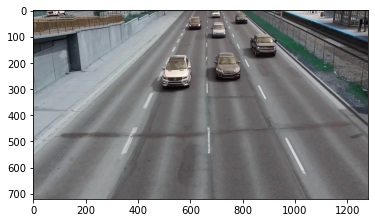

In [2]:
video = cv2.VideoCapture("Cars Moving On Road Final.mp4")

ret1, frame1 = video.read()
ret2, frame2 = video.read()

plt.imshow(frame1)

In [ ]:
# converting BGR to RGB
# changing the frames in grayscale
# and then displaying it

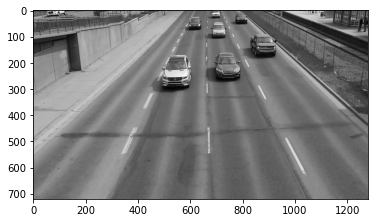

In [3]:
frame1_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
frame2_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

plt.imshow(frame1_gray, cmap='gray')

In [ ]:
# taken the gaussian blur frames
# displaying the blur frame

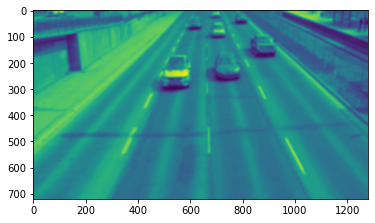

In [4]:
frame1_blur = cv2.GaussianBlur(frame1_gray, (21, 21), 0)
frame2_blur = cv2.GaussianBlur(frame2_gray, (21, 21), 0)

plt.imshow(frame1_blur)

In [ ]:
# taking the absloute difference between the frames (i.e. frame 1 and frame 2)
# now the cars that has moved are in some white color

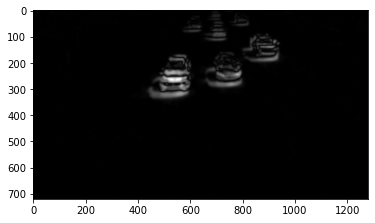

In [5]:
diff = cv2.absdiff(frame1_blur, frame2_blur)

plt.imshow(diff, cmap='gray')

In [ ]:
# now first we will create a threshold
# it will give us totally white color for those cars which are moving or in motion
# then we will find some white pixels to detect motion

(720, 1280)


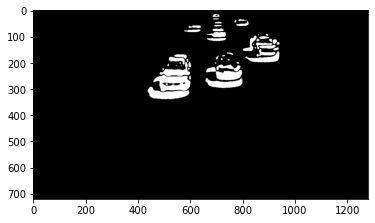

In [6]:
_, thresh = cv2.threshold(diff, 20, 255, cv2.THRESH_BINARY)

print(thresh.shape)
plt.imshow(thresh, cmap='gray')

In [ ]:
# calculating the number of white pixels
# checking condition if white pixels are more than 5% of total pixels in the frame
# if pixels are detected then the object is in motion otherwise not

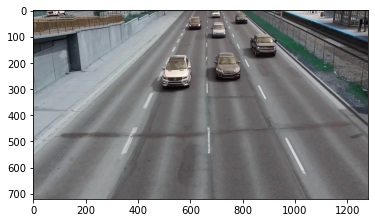

In [7]:
white_pixels = np.sum(thresh) / 255
    
rows, cols = thresh.shape
total_pixels = rows * cols

if white_pixels > 0.05 * total_pixels:
    cv2.putText(frame1, 'Motion Detected', (10, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 2)

plt.imshow(frame1)

In [ ]:
# now filling the gaps in white pixels using dilate (dilation)
# so that we can draw bounding boxes
# now these are the counters and can be detected 

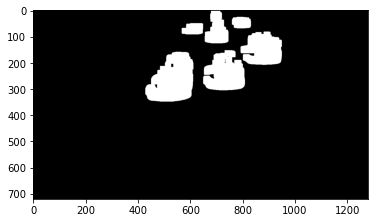

In [8]:
dilate = cv2.dilate(thresh, None, iterations = 9)

plt.imshow(dilate, cmap='gray')

In [ ]:
# finding the counters
# drawing the rectangles or bounding boxes to highlight the objects
# displaying the frame

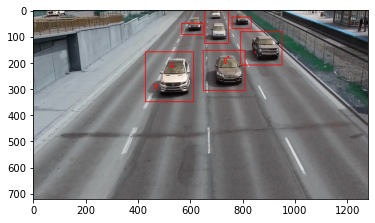

In [9]:
contours, _ = cv2.findContours(dilate, 1, 2)
display = frame2.copy()

for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)

  cv2.rectangle(display, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.imshow(display)